In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import datetime
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from thefuzz import fuzz, process
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [3]:
df = pd.read_csv("License_Data.csv")

In [4]:
df

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85890,12652-20120516,2143400,8011,1,UNITED PARCEL SERVICE,UNITED PARCEL SERVICE,1400 S JEFFERSON ST,CHICAGO,IL,60607.0,...,2012-05-16T00:00:00,2014-05-15T00:00:00,2012-05-07T00:00:00,2012-05-08T00:00:00,2012-12-29T00:00:00,NaN,41.863501,-87.642210,"{'latitude': '41.86350135244771', 'longitude':...",AAC
85891,1821421-20070522,1821421,317725,1,"EXPRESS BOARD UP SERVICE, INC.","EXPRESS BOARD UP SERVICE, INC.",8707 VANGUARD DR,MACHESNEY PARK,IL,61115.0,...,2007-05-22T00:00:00,2009-06-15T00:00:00,2007-05-22T00:00:00,2007-05-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
85892,74137-20090116,1939358,8458,2,ARAMARK SMMS LLC,ARAMARK FACILITY SERVICES,2300 WARRENVILLE RD 1ST,DOWNERS GROVE,IL,60515.0,...,2009-01-16T00:00:00,2011-01-15T00:00:00,2009-01-09T00:00:00,2009-12-08T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
85893,2049545-20111016,2110060,2156,43,GENERAL NUTRITION CORPORATION,GENERAL NUTRITION CENTER # 61,5151 S PULASKI RD SLAB ON GRADE T-21,CHICAGO,IL,60632.0,...,2011-10-16T00:00:00,2013-10-15T00:00:00,2011-10-03T00:00:00,2011-10-11T00:00:00,2012-05-08T00:00:00,NaN,41.799012,-87.723181,"{'latitude': '41.79901235310339', 'longitude':...",AAC


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [6]:
df.shape

(85895, 32)

In [7]:
df.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

ID                                   85895
LICENSE ID                           85895
ACCOUNT NUMBER                       38897
SITE NUMBER                            177
LEGAL NAME                           38744
DOING BUSINESS AS NAME               41686
ADDRESS                              42146
CITY                                  1223
STATE                                   54
ZIP CODE                              2172
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2383
POLICE DISTRICT                         28
LICENSE CODE                           106
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       49768
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

In [10]:
df.isnull().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [11]:
df=df.drop(['LICENSE CODE','WARD PRECINCT'],axis = 1)

##### The dataset is large so splitting it to numerical and categorical features

## Numerical feature

In [12]:
numerical = [feature for feature in df.columns if df[feature].dtype !="O"]
print(f"{numerical}")

['LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'WARD', 'PRECINCT', 'POLICE DISTRICT', 'LICENSE NUMBER', 'SSA', 'LATITUDE', 'LONGITUDE']


In [13]:
df[numerical]

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,WARD,PRECINCT,POLICE DISTRICT,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
0,1256593,32811,1,22.0,28.0,10.0,35342.0,25.0,41.843613,-87.714618
1,1639294,262311,29,33.0,23.0,17.0,1358463.0,60.0,41.961132,-87.699626
2,1980233,345008,1,NaN,NaN,NaN,1980233.0,NaN,NaN,NaN
3,1476582,273121,1,NaN,NaN,NaN,1476582.0,NaN,NaN,NaN
4,1896750,213785,1,NaN,NaN,NaN,1141408.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
85890,2143400,8011,1,11.0,28.0,1.0,12652.0,NaN,41.863501,-87.642210
85891,1821421,317725,1,NaN,NaN,NaN,1821421.0,NaN,NaN,NaN
85892,1939358,8458,2,NaN,NaN,NaN,74137.0,NaN,NaN,NaN
85893,2110060,2156,43,23.0,NaN,NaN,2049545.0,NaN,41.799012,-87.723181


In [14]:
df[numerical].dtypes

LICENSE ID           int64
ACCOUNT NUMBER       int64
SITE NUMBER          int64
WARD               float64
PRECINCT           float64
POLICE DISTRICT    float64
LICENSE NUMBER     float64
SSA                float64
LATITUDE           float64
LONGITUDE          float64
dtype: object

In [15]:
df[numerical].isnull().sum()

LICENSE ID             0
ACCOUNT NUMBER         0
SITE NUMBER            0
WARD               49701
PRECINCT           56701
POLICE DISTRICT    54012
LICENSE NUMBER         1
SSA                76446
LATITUDE           47246
LONGITUDE          47246
dtype: int64

In [16]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LICENSE ID       85895 non-null  int64  
 1   ACCOUNT NUMBER   85895 non-null  int64  
 2   SITE NUMBER      85895 non-null  int64  
 3   WARD             36194 non-null  float64
 4   PRECINCT         29194 non-null  float64
 5   POLICE DISTRICT  31883 non-null  float64
 6   LICENSE NUMBER   85894 non-null  float64
 7   SSA              9449 non-null   float64
 8   LATITUDE         38649 non-null  float64
 9   LONGITUDE        38649 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 6.6 MB


In [17]:
df[numerical].columns

Index(['LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'WARD', 'PRECINCT',
       'POLICE DISTRICT', 'LICENSE NUMBER', 'SSA', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [18]:
for i in df[numerical].columns:
    print(f" Unique[i]'s count: {df[numerical][i].nunique()}")
    print(f" {df[i].unique()}\n")

 Unique[i]'s count: 85895
 [1256593 1639294 1980233 ... 1939358 2110060 1461628]

 Unique[i]'s count: 38897
 [ 32811 262311 345008 ... 354402  64945 361777]

 Unique[i]'s count: 177
 [  1  29   2   3   5  19  30  14  42  12  35  21  94  13   4  22  10   6
  25 171  70   8   7  15   9  34  31  16  78  18  75  88 111  63  20  37
  36  38  11  27  66  89  33  79  48  62  23  73  26  77 112  64  17  80
  44 139  50  54  92  43  53 127  28 123 108  46  95  24 145  76  86  82
  49 116  67 105  40  65  69  97  32  52 119  83 122  45 215  41  93  99
  58  56  60 140  91 181 103  68 129  39 188  59  51 237  96  47 101  55
  74 126 121  57  85  72  90  61 146  81 114 183 120 307 144  87  71 117
 160 125 159  84 118 187 100 147 158 153 107 163 133 136 128 134 113 151
 115 135 102 138 148 166 130 164 106 137  98 150 173 110 172 124 109 131
 157 149 141 242 142 104 170 174 132 168 185 165 417 161 152]

 Unique[i]'s count: 50
 [22. 33. nan 25. 35.  2. 18. 17. 45. 39. 42. 30. 34. 43. 49. 10. 32.  1.


In [19]:
# Dropping the features that is not required in numerical feature
df = df.drop(['LATITUDE','LONGITUDE','SSA'], axis = 1)

## Categorical

In [20]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 20 categorical variables

The categorical variables are :

 ['ID', 'LEGAL NAME', 'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE', 'LICENSE DESCRIPTION', 'APPLICATION TYPE', 'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'LOCATION', 'LICENSE STATUS']


In [21]:
df[categorical].head()

,ID,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,LICENSE DESCRIPTION,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,LOCATION,LICENSE STATUS
0,35342-20020816,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623,Limited Business License,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,Mobile Food Dispenser,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,Home Repair,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,AAI
3,1476582-20040211,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,Limited Business License,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,AAI
4,1141408-20080516,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,Limited Business License,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,AAI


In [22]:
df.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'POLICE DISTRICT', 'LICENSE DESCRIPTION',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'LOCATION',
       'LICENSE STATUS'],
      dtype='object')

In [23]:
df[categorical].isnull().sum()

ID                                       0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
LICENSE DESCRIPTION                      0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TERM EXPIRATION DATE            18
LICENSE APPROVED FOR ISSUANCE         6789
DATE ISSUED                              0
LICENSE STATUS CHANGE DATE           55400
LOCATION                             47246
LICENSE STATUS                           0
dtype: int64

In [24]:

for i in df[categorical].columns:
    print(f" Unique[i]'s count: {df[categorical][i].nunique()}")
    print(f" {df[i].unique()}\n")

 Unique[i]'s count: 85895
 ['35342-20020816' '1358463-20051116' '1980233-20090722' ...
 '74137-20090116' '2049545-20111016' '1070196-20040216']

 Unique[i]'s count: 38744
 ['CARMEN CAHUE' 'ISLA TROPICAL, INC.' 'DJS REMODELING' ...
 'TRIPLE AAA WIRELESS, INC.' 'WOJCIECH GRANAT' 'JOSEPH M MINICK']

 Unique[i]'s count: 41686
 ["CLAUDIA'S BRIDAL SHOP" 'ISLA TROPICAL' 'DJS REMODELING, INC.' ...
 'QUICKCOM' 'ALBERT ELECTRIC CO' 'REBEL MEDIA']

 Unique[i]'s count: 42146
 ['2625 S CENTRAL PARK AVE  1' '2825 W MONTROSE AVE' '1605  CLAVEY RD 1'
 ... '6522 W 107 ST 1ST' '5630 N SHERIDAN RD  505' '8707  VANGUARD DR']

 Unique[i]'s count: 1223
 ['CHICAGO' 'HIGHLAND' 'LEMONT' ... 'ABERDEEN' 'PENSACOLA' 'MACHESNEY PARK']

 Unique[i]'s count: 54
 ['IL' 'IN' 'MS' 'NY' 'PA' 'MO' 'WI' 'GA' 'MI' 'TX' 'FL' 'MD' 'IA' 'TN'
 'AZ' 'CT' 'NJ' 'CO' 'CA' 'NC' 'MN' 'KS' 'NV' 'SD' 'VA' 'MA' 'DC' 'NE'
 'OH' 'SC' 'DE' 'LA' 'UT' 'AL' 'WA' 'VT' 'AR' 'ON' 'MT' 'HI' 'RI' 'OR'
 'NM' 'KY' 'OK' 'QC' 'NH' 'ID' 'AK' 'CN' 'WV' 

In [25]:
# converting date & time to datetime format
df['LICENSE TERM START DATE'] =  pd.to_datetime(df['LICENSE TERM START DATE'], format='%Y-%m-%d')
df['LICENSE TERM EXPIRATION DATE'] =  pd.to_datetime(df['LICENSE TERM EXPIRATION DATE'], format='%Y-%m-%d')
df['LICENSE APPROVED FOR ISSUANCE'] =  pd.to_datetime(df['LICENSE APPROVED FOR ISSUANCE'], format='%Y-%m-%d')
df['DATE ISSUED'] =  pd.to_datetime(df['DATE ISSUED'], format='%Y-%m-%d')
df['LICENSE STATUS CHANGE DATE'] =  pd.to_datetime(df['LICENSE STATUS CHANGE DATE'], format='%Y-%m-%d')
df['APPLICATION CREATED DATE'] =  pd.to_datetime(df['APPLICATION CREATED DATE'], format='%Y-%m-%d')
df['APPLICATION REQUIREMENTS COMPLETE'] =  pd.to_datetime(df['APPLICATION REQUIREMENTS COMPLETE'], format='%Y-%m-%d')
df['PAYMENT DATE'] =  pd.to_datetime(df['PAYMENT DATE'], format='%Y-%m-%d')

In [26]:
# Dropping the features that is not required
df = df.drop(['LEGAL NAME','DOING BUSINESS AS NAME','LOCATION','ID','ADDRESS','APPLICATION CREATED DATE','ZIP CODE'], axis = 1)

In [27]:
df.head()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,WARD,PRECINCT,POLICE DISTRICT,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,LICENSE STATUS
0,1256593,32811,1,CHICAGO,IL,22.0,28.0,10.0,Limited Business License,35342.0,RENEW,2002-06-28,2002-08-21,N,2002-08-16,2003-08-15,2002-08-21,2006-04-11,NaT,AAI
1,1639294,262311,29,CHICAGO,IL,33.0,23.0,17.0,Mobile Food Dispenser,1358463.0,RENEW,2005-09-22,2005-11-03,N,2005-11-16,2006-11-15,2006-04-05,2006-06-12,2006-06-15,AAC
2,1980233,345008,1,HIGHLAND,IL,NaN,NaN,NaN,Home Repair,1980233.0,ISSUE,2009-07-22,2009-07-22,N,2009-07-22,2011-07-15,2009-07-22,2009-07-22,NaT,AAI
3,1476582,273121,1,LEMONT,IL,NaN,NaN,NaN,Limited Business License,1476582.0,ISSUE,2004-02-10,2004-02-10,N,2004-02-11,2005-02-15,2004-02-10,2004-02-11,NaT,AAI
4,1896750,213785,1,WAUKEGAN,IL,NaN,NaN,NaN,Limited Business License,1141408.0,RENEW,2008-03-24,2008-06-04,N,2008-05-16,2010-05-15,2008-06-04,2008-06-05,NaT,AAI


In [28]:
#Sorting the dataframe
df.sort_values(by='APPLICATION REQUIREMENTS COMPLETE', inplace=True)

# Filling missing the dates by forward fill
df[['LICENSE STATUS CHANGE DATE']] = df[['LICENSE STATUS CHANGE DATE']].fillna(method = 'ffill')

In [29]:
df.isnull().sum()

LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
CITY                                     0
STATE                                    0
WARD                                 49701
PRECINCT                             56701
POLICE DISTRICT                      54012
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TERM EXPIRATION DATE            18
LICENSE APPROVED FOR ISSUANCE         6789
DATE ISSUED                              0
LICENSE STATUS CHANGE DATE               5
LICENSE STATUS                           0
dtype: int64

In [30]:
# Function to impute with 0
def impute_nil(nil_list):
    for i in nil_list:
        df[i] = df[i].fillna(0)
    
    
nil_list = ["WARD","PRECINCT","POLICE DISTRICT"]
impute_nil(nil_list)

In [31]:
# dropping the rows that have missing values
df = df.dropna(how = 'any', axis = 0)

In [32]:
df.isnull().sum()

LICENSE ID                           0
ACCOUNT NUMBER                       0
SITE NUMBER                          0
CITY                                 0
STATE                                0
WARD                                 0
PRECINCT                             0
POLICE DISTRICT                      0
LICENSE DESCRIPTION                  0
LICENSE NUMBER                       0
APPLICATION TYPE                     0
APPLICATION REQUIREMENTS COMPLETE    0
PAYMENT DATE                         0
CONDITIONAL APPROVAL                 0
LICENSE TERM START DATE              0
LICENSE TERM EXPIRATION DATE         0
LICENSE APPROVED FOR ISSUANCE        0
DATE ISSUED                          0
LICENSE STATUS CHANGE DATE           0
LICENSE STATUS                       0
dtype: int64

In [33]:
df.shape

(78383, 20)

###### Extracting year from the dates

In [34]:
#Getting year and month from datetime data

def get_year(colname, dfcolname):
    df[colname] = df[dfcolname].apply(lambda x:x.year)

In [35]:
get_year('APPLICATION REQUIREMENTS COMPLETE YEAR', 'APPLICATION REQUIREMENTS COMPLETE')
get_year('PAYMENT YEAR', 'PAYMENT DATE')
get_year('LICENSE TERM START YEAR', 'LICENSE TERM START DATE')
get_year('LICENSE APPROVED FOR YEAR','LICENSE APPROVED FOR ISSUANCE')
get_year('DATE ISSUED YEAR','DATE ISSUED')
get_year('LICENSE TERM EXPIRATION YEAR','LICENSE TERM EXPIRATION DATE')
get_year('LICENSE APPROVED FOR ISSUANCE YEAR','LICENSE APPROVED FOR ISSUANCE')
get_year('DATE ISSUED YEAR','DATE ISSUED')
get_year('LICENSE STATUS CHANGE YEAR','LICENSE STATUS CHANGE DATE')

In [36]:
#Dropping the Dates as the year has been extracted from it
col_list = ['PAYMENT DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'LICENSE TERM EXPIRATION DATE', 'DATE ISSUED', 'LICENSE TERM START DATE', 
            'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']

In [37]:
df = df.drop(col_list, axis=1)

In [38]:
#geting a new lisence valdity
df['LICENSE VALIDITY'] = abs(df['LICENSE TERM EXPIRATION YEAR']-df['LICENSE TERM START YEAR'])

In [39]:
df.head()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,WARD,PRECINCT,POLICE DISTRICT,LICENSE DESCRIPTION,LICENSE NUMBER,...,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,LICENSE TERM START YEAR,LICENSE APPROVED FOR YEAR,DATE ISSUED YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY
47977,316534,66610,54,CHICAGO,IL,25.0,15.0,10.0,"Scavenger, Private",85875.0,...,AAI,2000,2001,2002,2002,2002,2002,2002,2003,0
29512,266927,41242,1,CHICAGO,IL,42.0,9.0,1.0,Limited Business License,59913.0,...,AAI,2000,2003,2000,2003,2003,2001,2003,2003,1
46871,287539,20796,2,SKOKIE,IL,0.0,0.0,0.0,Limited Business License,67623.0,...,AAI,2000,2001,2000,2001,2002,2001,2001,2003,1
80754,69942,89227,17,CHICAGO,IL,0.0,0.0,0.0,Limited Business License,15109.0,...,AAI,2000,2003,2000,2003,2003,2001,2003,2003,1
31082,295260,60597,1,RICHTON PARK,IL,0.0,0.0,0.0,Home Repair,71201.0,...,AAI,2000,2002,2000,2002,2002,2001,2002,2003,1


###### Mapping the  target variable

In [40]:
LICENSE_STATUS = {'AAC': 0, 'AAI': 1, 'REV':2, 'REA':3, 'INQ':4}
df['LICENSE STATUS'] = df['LICENSE STATUS'].map(LICENSE_STATUS)
df['LICENSE STATUS']

47977    1
29512    1
46871    1
80754    1
31082    1
        ..
44148    1
68452    1
27745    1
83836    1
69613    1
Name: LICENSE STATUS, Length: 78383, dtype: int64

###### Label encoding the input variable

In [41]:
# Label encoding all the non numerical values

def label_encode(df):
    for i in df.columns:
        if df[i].dtypes == 'object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder()
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                    print (e)
    return df
                    

In [42]:
df = label_encode(df)

CITY encoded
STATE encoded
LICENSE DESCRIPTION encoded
APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded


In [43]:
df

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,WARD,PRECINCT,POLICE DISTRICT,LICENSE DESCRIPTION,LICENSE NUMBER,...,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,LICENSE TERM START YEAR,LICENSE APPROVED FOR YEAR,DATE ISSUED YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY
47977,316534,66610,54,153,13,25.0,15.0,10.0,80,85875.0,...,1,2000,2001,2002,2002,2002,2002,2002,2003,0
29512,266927,41242,1,153,13,42.0,9.0,1.0,42,59913.0,...,1,2000,2003,2000,2003,2003,2001,2003,2003,1
46871,287539,20796,2,794,13,0.0,0.0,0.0,42,67623.0,...,1,2000,2001,2000,2001,2002,2001,2001,2003,1
80754,69942,89227,17,153,13,0.0,0.0,0.0,42,15109.0,...,1,2000,2003,2000,2003,2003,2001,2003,2003,1
31082,295260,60597,1,716,13,0.0,0.0,0.0,31,71201.0,...,1,2000,2002,2000,2002,2002,2001,2002,2003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44148,2454169,63232,1,601,13,0.0,0.0,0.0,42,17791.0,...,1,2016,2016,2016,2016,2016,2018,2016,2016,2
68452,2455678,331382,1,423,13,0.0,0.0,0.0,42,1904912.0,...,1,2016,2016,2016,2016,2016,2018,2016,2016,2
27745,2455190,287280,1,154,13,0.0,0.0,0.0,42,1575898.0,...,1,2016,2016,2016,2016,2016,2018,2016,2016,2
83836,2453886,36834,2,153,13,27.0,7.0,12.0,42,1044321.0,...,1,2016,2016,2016,2016,2016,2018,2016,2016,2


###### Checking Correaltions

In [ ]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='yellow')
plt.title(' Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

###### Checking target variable

In [45]:
x= df.drop(['LICENSE STATUS'],axis = 1)
y= df["LICENSE STATUS"]

In [46]:
x.shape, y.shape

((78383, 21), (78383,))

###### Balancing the Target variable by performing oversampling

In [47]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_resampled , y_resampled = ros.fit_resample(x,y)

In [48]:
y_resampled.value_counts()

1    50756
0    50756
2    50756
3    50756
Name: LICENSE STATUS, dtype: int64

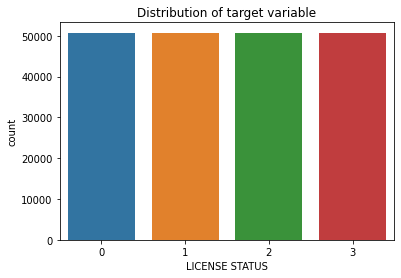

In [49]:
plt.title('Distribution of target variable')
sns.countplot(y_resampled)
plt.show()

In [50]:
x_resampled

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,WARD,PRECINCT,POLICE DISTRICT,LICENSE DESCRIPTION,LICENSE NUMBER,...,CONDITIONAL APPROVAL,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,LICENSE TERM START YEAR,LICENSE APPROVED FOR YEAR,DATE ISSUED YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY
0,316534,66610,54,153,13,25.0,15.0,10.0,80,85875.0,...,0,2000,2001,2002,2002,2002,2002,2002,2003,0
1,266927,41242,1,153,13,42.0,9.0,1.0,42,59913.0,...,0,2000,2003,2000,2003,2003,2001,2003,2003,1
2,287539,20796,2,794,13,0.0,0.0,0.0,42,67623.0,...,0,2000,2001,2000,2001,2002,2001,2001,2003,1
3,69942,89227,17,153,13,0.0,0.0,0.0,42,15109.0,...,0,2000,2003,2000,2003,2003,2001,2003,2003,1
4,295260,60597,1,716,13,0.0,0.0,0.0,31,71201.0,...,0,2000,2002,2000,2002,2002,2001,2002,2003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203019,2061724,32745,1,153,13,33.0,13.0,14.0,53,35093.0,...,0,2010,2010,2010,2010,2010,2012,2010,2012,2
203020,2041316,341709,1,153,13,41.0,1.0,16.0,45,1963143.0,...,0,2010,2010,2010,2010,2010,2012,2010,2011,2
203021,2041316,341709,1,153,13,41.0,1.0,16.0,45,1963143.0,...,0,2010,2010,2010,2010,2010,2012,2010,2011,2
203022,2041316,341709,1,153,13,41.0,1.0,16.0,45,1963143.0,...,0,2010,2010,2010,2010,2010,2012,2010,2011,2


In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [52]:
select_kbest_rank_features= SelectKBest(score_func= chi2, k=5)
kbest_features= select_kbest_rank_features.fit(x,y)

df_kscore= pd.DataFrame(kbest_features.scores_,columns=['Score'])
df_columns= pd.DataFrame(x_resampled.columns)

kbest_features_rank= pd.concat([df_kscore,df_columns], axis=1)
kbest_features_rank.columns= ['k_score', 'features']

kbest_features_rank
print(kbest_features_rank.sort_values(by='k_score', ascending= False))

         k_score                                features
0   3.186466e+08                              LICENSE ID
9   9.762740e+07                          LICENSE NUMBER
1   9.681042e+06                          ACCOUNT NUMBER
3   2.332885e+06                                    CITY
5   5.228124e+05                                    WARD
7   3.219446e+05                         POLICE DISTRICT
6   6.658173e+04                                PRECINCT
2   1.915675e+04                             SITE NUMBER
8   4.472838e+03                     LICENSE DESCRIPTION
20  8.444684e+02                        LICENSE VALIDITY
4   5.391406e+02                                   STATE
17  4.145931e+01            LICENSE TERM EXPIRATION YEAR
12  4.012491e+01  APPLICATION REQUIREMENTS COMPLETE YEAR
11  3.360171e+01                    CONDITIONAL APPROVAL
15  3.273354e+01               LICENSE APPROVED FOR YEAR
18  3.273354e+01      LICENSE APPROVED FOR ISSUANCE YEAR
14  3.179530e+01               

In [ ]:
X_resampled = x_resampled.drop(columns = ['CITY','APPLICATION TYPE','LICENSE STATUS CHANGE YEAR','SITE NUMBER','DATE ISSUED YEAR','PAYMENT YEAR','LICENSE TERM START YEAR','LICENSE APPROVED FOR ISSUANCE YEAR','CONDITIONAL APPROVAL','POLICE DISTRICT','LICENSE ID'])

In [54]:
X_resampled

,ACCOUNT NUMBER,STATE,WARD,PRECINCT,LICENSE NUMBER,LICENSE APPROVED FOR YEAR,LICENSE VALIDITY
0,66610,13,25.0,15.0,85875.0,2002,0
1,41242,13,42.0,9.0,59913.0,2003,1
2,20796,13,0.0,0.0,67623.0,2001,1
3,89227,13,0.0,0.0,15109.0,2003,1
4,60597,13,0.0,0.0,71201.0,2002,1
...,...,...,...,...,...,...,...
203019,32745,13,33.0,13.0,35093.0,2010,2
203020,341709,13,41.0,1.0,1963143.0,2010,2
203021,341709,13,41.0,1.0,1963143.0,2010,2
203022,341709,13,41.0,1.0,1963143.0,2010,2


###### PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 20)

variance = pca.explained_variance_ratio_
variance

new_feature_index = np.argsort(variance, axis=0)[0:14]

new_feature_index

pd.DataFrame(X_pca)

###### Splitting the data into train and test

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.25, random_state = 42)

In [56]:
X_train.shape, y_train.shape

((152268, 7), (152268,))

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model building

#####  1.	Random Forest

In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier()

In [60]:
# hyperparameter optimization
params = {'n_estimators': [4,6,8,10,15],
         'max_features': [ 'log2', 'sqrt', 'auto'],
         'criterion': ['gini'],
         'max_depth': [2,3,5],
         'min_samples_split': [2,3,5]}
         


# Run the grid search
grid_search = GridSearchCV(classifier1, params)
          
grid_search = grid_search.fit(X_train, y_train)

# Set the randomforest to the best combination of parameters
classifier1 = grid_search.best_estimator_

#Train the mpdel
classifier1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='auto', min_samples_split=3,
                       n_estimators=15)

In [61]:
y_pred1 = classifier1.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [63]:
print('accuracy % =', accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

accuracy % = 0.8171841752699188
              precision    recall  f1-score   support

           0       0.69      0.59      0.64     12699
           1       0.87      0.90      0.88     12689
           2       0.73      0.77      0.75     12516
           3       0.95      1.00      0.98     12852

    accuracy                           0.82     50756
   macro avg       0.81      0.82      0.81     50756
weighted avg       0.81      0.82      0.81     50756



###### 2. XGBoost

In [64]:
from xgboost import XGBClassifier

In [65]:
classifier2 = XGBClassifier(learning_rate = 0.02, n_estimators = 10000, objective = 'multi:softmax', silent= True)

In [ ]:
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 6]
        }

# Run the grid search
grid_search = GridSearchCV(classifier2, parameters)
grid_search = grid_search.fit(X_train, y_train)

# Set the rf to the best combination of parameters
clasifier2 = grid_search.best_estimator_

# Train the model using the training sets
classifier2.fit(X_train, y_train)

[22:00:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [ ]:
y_pred2 = classifier2.predict(X_train)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred2) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )

##### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklear.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [ ]:
adaboost = AdaBoostClassifier()
param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]}
grid_search = GridSearchCV(adaboost, param_grid=param_grid, cv=5)
grid_search.fit(X_sc, y_train)

best_adaboost = grid_search.best_estimator_


In [ ]:
y_pred3 = best_adaboost.predict(X_test)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred3) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )